# Análise de fatores associados ao transtorno depressivo na população americana: Uma abordagem com dados do NHANES

National Health and Nutrition Examination Survey (NHANES), em Português, Pesquisa Nacional de Exame de Saúde e Nutrição (NHANES), é um programa de estudos projetado para avaliar o estado de saúde e nutricional de adultos e crianças nos Estados Unidos. O levantamento dos dados combina entrevistas e exames físicos.

Os dados seguintes que serão analizados trata sobre o trastorno depressivo, um problema multifatorial que pode ter varias possiveis combinações e pode ser desencadeada por uma interação complexa de fatores biológicos, psicológicos e sociais.

A depressão nada mais é que um transtorno de saúde mental comum que apresenta características como uma pessoa se sente, pensa e envelhece. É caracterizado por uma tristeza persistente, perda de interesse ou prazer em atividades anteriormente prazerosas, alterações de apetite e sono, cansaço, dificuldade de concentração, e, em casos que podem  até mais graves.



## Objetivo da Análise

Os dados seguintes que serão analizados trata sobre o trastorno depressivo, um problema multifatorial que pode ter varias possiveis combinações como causa.

Dentre este contexo, temos como objetivo analisar os dados do NHANES referente a periodo de 2005-2006 respondendo as seguintes questões:

> Qual é o perfil de indivíduos adultos, maiores de 18 anos, com sintomas depressivos no período de 2005-2006 nos Estados Unidos?

> Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão na população?

Para responder estes questionamentos iremos analizar e explorar as váriaveis disponiveis nestes dois dataset Healthy Eating Index e os registros de atividades realizadas por cada pessoa, o qual iremos cruzar com os indicadores de sintomas depresivos.

Com isto buscaremos padrões para obtermos insights valiosos sobre o estilo de vida, prevalência ou gravidade da depressão.



# Obtenção dos dados

As seguintes base de dados foram extraidos do NHANES mencionado acima, veja:
> **DEMO_PHQ.csv**: Banco de dados contendo 5334 observações de adultos  pesquisados no NHANES de 2005-2006;

> **PAG_HEI.csv**: Banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES de 2005-2006;

In [ ]:
# Dados armazenado no Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando algunmas bibliotecas importante para analisar os dados
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import missingno

import numpy as np

import folium

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from scipy.stats import f_oneway, sem, t, ttest_ind, chi2_contingency, norm

# Dicionário da base de dados: `DEMO_PHQ.csv`

Nesta etapa temos por objetivo entender as variáveis composta nesta base de dados e sua estruturação. Neste dataset temos 5334 observações realizadas de adultos no periodo de 2005-2006.

**SEQN:** Identificador único do respondente.

**DPQ010:**
> Questionamento realizado: Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir:
Pouco interesse ou pouco prazer em fazer as coisas?

    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe


**DPQ020:**
> Questionamento realizado: Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Se sentiu para baixo, deprimido(a) ou sem perspectiva?

    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe


**DPQ030:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o
costume?
      
    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe


**DPQ040:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Se sentiu cansado(a) ou com pouca energia?

    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe

**DPQ050:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Falta de apetite ou comeu demais?


    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe

**DPQ060:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou
sua família ou a você mesmo(a)?

    Valores:
     0 = Nenhuma vez
     1 = Menos de uma semana
     2 = Uma semana ou mais
     3 = Quase todos os dias
     7 = Se recusou a responder
     9 = Não sabe

**DPQ070:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
     
    Valores:
     0 = Nenhuma vez
     1 = Menos de uma semana
     2 = Uma semana ou mais
     3 = Quase todos os dias
     7 = Se recusou a responder
     9 = Não sabe

**DPQ080:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?

    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe

**DPQ090:**
> Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos
problemas a seguir: Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?

    Valores:
      0 = Nenhuma vez
      1 = Menos de uma semana
      2 = Uma semana ou mais
      3 = Quase todos os dias
      7 = Se recusou a responder
      9 = Não sabe

**RIAGENDR:**
> Gênero

    Valores:
      1 = Masculino
      2 = Feminino

**RIDAGEYR:**
> Idade em anos

**RIDRETH1:**
> Raça/Etnia

    Valores:
       1 = Branco não- hispânico
       2 = Negro não- hispânico
       3 = Mexicano- americano
       4 = Outro
       5 = Outro - Hispânico
**DMDEDUC:**
> Escolaridade

    Valores:
      1 = Menor que 9o ano
      2 = 9-12o ano
      3 = Ensino médio
      4 = Ensino superior incompleto
      5 = Superior completo ou maior
      7 = Se recusou a responder
      9 = Não sabe

**INDFMINC:**
> Renda anual familiar (US$)

    Valores:
      1 = 0-4999
      2 - 5000- 9999
      3 = 10000- 14999
      4 = 15000- 19999
      5 = 20000- 24999
      6 = 25000- 34999
      7 = 35000- 44999
      8 = 45000- 54999
      9 = 55000- 64999
      10 = 65000- 74999
      11 = Maior ou igual a 75000

# Dicionário da base de dados: `PAG_HEI.csv`

Seguiremos com o objetivo de entender as variáveis composta nesta base de dados e sua estruturação. Neste dataset temos 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006, contendo as seguintes variáveis:

**SEQN:**
> Identificador único do respondente


**PAG_MINW:**

>Tempo total semanal de atividade aeróbica moderada-
vigorosa em minutos segundo o Physical Activity
 Guideline (PAG).

 **ADHERENCE:**

 >Grupo de aderência ao Physical Activity Guideline (PAG)

    Valores:
     1 = Baixo (< 150 min/semana)
     2 = Adequado (150-300 min/semana)
     3 = Acima (> 300 min/semana)

**HEI2015C1_TOTALVEG:**
>Healthy Eating Index - Componente 1 - Total de Vegetais

    Valores:
     0-5

**HEI2015C2_GREEN_AND_BEAN:**
> Healthy Eating Index - Componente 2 - Verduras verde- escuras e leguminosas

    Valores:
     0-5

**HEI2015C3_TOTALFRUIT:**
> Healthy Eating Index - Componente 3 - Frutas totais

    Valores:
     0-5

**HEI2015C4_WHOLEFRUIT:**
> Healthy Eating Index - Componente 4 - Frutas in natura

    Valores:
     0-5

**HEI2015C5_WHOLEGRAIN:**
> Healthy Eating Index - Componente 5 - Grãos integrais

    Valores:
     0-10

**HEI2015C6_TOTALDAIRY:**
>  Healthy Eating Index - Componente 6 - Laticínios

    Valores:
     0-10

**HEI2015C7_TOTPROT**
> Healthy Eating Index - Componente 7 - Proteínas

    Valores:
     0-5

**HEI2015C8_SEAPLANT_PROT:**
> Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais

    Valores:
     0-5

**HEI2015C9_FATTYACID:**
> Healthy Eating Index - Componente 9 - Ácido-graxo

    Valores:
     0-10

**HEI2015C10_SODIUM:**
> Healthy Eating Index - Componente 10 - Sódio

    Valores:
     0-10

**HEI2015C11_REFINEDGRAIN:**
> Healthy Eating Index - Componente 11 - Grãos refinados

    Valores:
     0-10

**HEI2015C12_SFAT:**
> Healthy Eating Index - Componente 12 - Gordura saturada

    Valores:
     0-10

**HEI2015C13_ADDSUG:**
> Healthy Eating Index - Componente 13 - Açúcares adicionados

    Valores:
     0-10

**HEI2015_TOTAL_SCORE:**
> Healthy Eating Index - Escore total

    Valores:
     0-100

# Analisando a base de dados `DEMO_PHQ.csv`

In [ ]:
# importando o arquivo listings.csv para um DataFrame
df_demo = pd.read_csv("/content/drive/MyDrive/Case depressão | Portfólio/DEMO_PHQ.csv")

In [ ]:
# Ver as 5 primeiras entradas
df_demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_demo.shape[0])
print("Variáveis: ", df_demo.shape[1])

Entradas:  5334
Variáveis:  15


In [ ]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [ ]:
# ordenar de forma decrescente as variáveis por seus valores ausentes
(df_demo.isnull().sum() / df_demo.shape[0]).sort_values(ascending=False)

,0
DPQ010,0.093363
DPQ020,0.093363
DPQ030,0.093363
DPQ040,0.093363
DPQ050,0.093363
DPQ060,0.093363
DPQ070,0.093363
DPQ080,0.093363
DPQ090,0.093363
INDFMINC,0.008811


Observa-se que há itens nulos neste dataset, e por isto, precisamos lidar com estes dados faltantes de forma que não altere a qualidade da análise. Neste caso optei por apagar os dados faltantes, pois são poucos e não irão alterar o resultado da análise.

In [ ]:
df_demo.dropna(axis = 0, inplace = True)

In [ ]:
# ordenar em forma decrescente as variáveis por seus valores ausentes
(df_demo.isnull().sum() / df_demo.shape[0]).sort_values(ascending=False)

,0
SEQN,0.0
DPQ010,0.0
DPQ020,0.0
DPQ030,0.0
DPQ040,0.0
DPQ050,0.0
DPQ060,0.0
DPQ070,0.0
DPQ080,0.0
DPQ090,0.0


Criarei uma coluna,com a variavel númerica `DPQ_ALL_num` que será a soma de todas as perguntas feitas no dataset. Observe a resposta `Não sei ` ou `Se recusou a responder` podem acabar interferindo no entendimento da análise, por isso, irei mapeá-las para 0.

In [ ]:
cols_to_sum = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for col in cols_to_sum:
    df_demo[col] = df_demo[col].replace({7: 0, 9: 0})

df_demo["DPQ_ALL_num"] = df_demo[cols_to_sum].sum(axis=1)

# Ver as  primeiras entradas
df_demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,DPQ_ALL_num
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0


As variáveis das respostas `Nâo sabe` e `Se recusou a responder` podem interferir no resultado, por isso irei renomear para `nenhuma vez` e assim, criarei uma coluna `DPQ_ALL_cat` para realizar a análise de todos os itens dos questionamentos realizado no dataset, buscando entender o perfil comportamental de pessoas com depressão.

Criarei uma segunda coluna, desta vez com a variavel categórica `DPQ_ALL_cat` que será as repostas de todas as perguntas feitas no dataset. Observe a resposta `Não sei ` ou `Se recusou a responder` podem acabar interferindo no entendimento da análise, por isso, irei mapeá-las para nenhuma vez.

In [ ]:
# Definir as colunas alvo
dpq_columns = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']

# Substituir os valores numéricos por categorias textuais
categoria_map = {
    0: 'Nenhuma vez',
    1: 'Menos de uma semana',
    2: 'Uma semana ou mais',
    3: 'Quase todos os dias',
    7: 'Se recusou a responder',
    9: 'Não sabe'
}

# Aplicar a substituição para as colunas
df_demo[dpq_columns] = df_demo[dpq_columns].replace(categoria_map)

In [ ]:
dpq_columns = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
df_demo[dpq_columns] = df_demo[dpq_columns].replace({7: 0, 9: 0})

In [ ]:
df_demo["DPQ_ALL_cat"] = df_demo[dpq_columns].sum(axis=1)

In [ ]:
# Ver as 20 primeiras entradas
df_demo.head(20)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,DPQ_ALL_num,DPQ_ALL_cat
1,31131,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,2,44,4,4,11.0,0.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNe...
2,31132,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,1,70,3,5,11.0,0.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNe...
3,31134,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,1,73,3,3,12.0,0.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNe...
4,31139,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Quase todos os dias,Menos de uma semana,Nenhuma vez,Nenhuma vez,Nenhuma vez,2,18,2,3,11.0,4.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezQu...
5,31143,Nenhuma vez,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Nenhuma vez,Nenhuma vez,1,19,3,4,11.0,6.0,Nenhuma vezMenos de uma semanaMenos de uma sem...
6,31144,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,1,21,2,3,3.0,0.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNe...
7,31149,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,2,85,3,2,1.0,0.0,Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNe...
8,31150,Menos de uma semana,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,1,79,3,3,3.0,1.0,Menos de uma semanaNenhuma vezNenhuma vezNenhu...
9,31151,Nenhuma vez,Nenhuma vez,Menos de uma semana,Menos de uma semana,Nenhuma vez,Nenhuma vez,Menos de uma semana,Nenhuma vez,Nenhuma vez,2,59,4,3,7.0,3.0,Nenhuma vezNenhuma vezMenos de uma semanaMenos...
10,31152,Nenhuma vez,Nenhuma vez,Nenhuma vez,Menos de uma semana,Menos de uma semana,Nenhuma vez,Nenhuma vez,Menos de uma semana,Nenhuma vez,2,27,1,3,7.0,3.0,Nenhuma vezNenhuma vezNenhuma vezMenos de uma ...


In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_demo.shape[0])
print("Variáveis: ", df_demo.shape[1])

Entradas:  4800
Variáveis:  17


In [ ]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 1 to 5333
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         4800 non-null   int64  
 1   DPQ010       4800 non-null   object 
 2   DPQ020       4800 non-null   object 
 3   DPQ030       4800 non-null   object 
 4   DPQ040       4800 non-null   object 
 5   DPQ050       4800 non-null   object 
 6   DPQ060       4800 non-null   object 
 7   DPQ070       4800 non-null   object 
 8   DPQ080       4800 non-null   object 
 9   DPQ090       4800 non-null   object 
 10  RIAGENDR     4800 non-null   int64  
 11  RIDAGEYR     4800 non-null   int64  
 12  RIDRETH1     4800 non-null   int64  
 13  DMDEDUC      4800 non-null   int64  
 14  INDFMINC     4800 non-null   float64
 15  DPQ_ALL_num  4800 non-null   float64
 16  DPQ_ALL_cat  4800 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 675.0+ KB


# Analisando a base de dados `PAG_HEI.csv`

In [ ]:
# importando o arquivo listings.csv para um DataFrame
df_pag = pd.read_csv("/content/drive/MyDrive/Case depressão | Portfólio/PAG_HEI.csv")

In [ ]:
# Ver as 5 primeiras entradas
df_pag.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_pag.shape[0])
print("Variáveis: ", df_pag.shape[1])

Entradas:  9424
Variáveis:  17


In [ ]:
df_pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_pag.isnull().sum() / df_pag.shape[0]).sort_values(ascending=False)

,0
ADHERENCE,0.241299
PAG_MINW,0.241299
HEI2015C6_TOTALDAIRY,0.092848
HEI2015C8_SEAPLANT_PROT,0.092848
HEI2015C13_ADDSUG,0.092848
HEI2015C12_SFAT,0.092848
HEI2015C11_REFINEDGRAIN,0.092848
HEI2015C10_SODIUM,0.092848
HEI2015C9_FATTYACID,0.092848
HEI2015_TOTAL_SCORE,0.092848


Neste dataset também temos valores nulos, tratarei esses dados conforme fiz no outro dataset, excluindo as linhas que contém valores ausentes.

In [ ]:
df_pag.dropna(axis = 0, inplace = True)

In [ ]:
# Ver as 5 primeiras entradas
df_pag.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
5,31133,0.000000,1.0,1.417400,0.000000,2.083333,1.317204,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653
6,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826


In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df_pag.shape[0])
print("Variáveis: ", df_pag.shape[1])

Entradas:  6579
Variáveis:  17


## Realizando o merge entre as bases de dados

In [ ]:
df = pd.merge(df_demo, df_pag, on='SEQN', how='inner')

In [ ]:
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31131,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,Nenhuma vez,Nenhuma vez,Nenhuma vez,Nenhuma vez,Quase todos os dias,Menos de uma semana,Nenhuma vez,Nenhuma vez,Nenhuma vez,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,Nenhuma vez,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Menos de uma semana,Nenhuma vez,Nenhuma vez,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131


In [ ]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  4702
Variáveis:  33


# ANÁLISE EXPLORATÓRIA UNIVARIADA

# Analisando as Variáveis
A coluna `DPQ_ALL_cat` são os somatórios de todas as colunas dos dados relacionados aos questionamentos sobre a depressão. Seguiremos com a plotagem de alguns gráficos para observamos a distribuição das variáveis dos seguintes valores:

 0 = Nenhuma vez

 1 = Menos de uma semana

 2 = Uma semana ou mais

 3 = Quase todos os dias


In [ ]:
# Verificando as categorias únicas na coluna DPQ_ALL
categorias_unicas = df_demo['DPQ_ALL_cat'].unique()

# Exibir as categorias únicas
print(categorias_unicas)


['Nenhuma vezNenhuma vezNenhuma vezNenhuma vezNenhuma vezNenhuma vezNenhuma vezNenhuma vezNenhuma vez'
 'Nenhuma vezNenhuma vezNenhuma vezNenhuma vezQuase todos os diasMenos de uma semanaNenhuma vezNenhuma vezNenhuma vez'
 'Nenhuma vezMenos de uma semanaMenos de uma semanaMenos de uma semanaMenos de uma semanaMenos de uma semanaMenos de uma semanaNenhuma vezNenhuma vez'
 ...
 'Quase todos os diasMenos de uma semanaMenos de uma semanaQuase todos os diasMenos de uma semanaNenhuma vezNenhuma vezNenhuma vezNenhuma vez'
 'Uma semana ou maisMenos de uma semanaUma semana ou maisQuase todos os diasUma semana ou maisNenhuma vezNenhuma vezNenhuma vezNenhuma vez'
 'Nenhuma vezUma semana ou maisNenhuma vezMenos de uma semanaMenos de uma semanaUma semana ou maisMenos de uma semanaQuase todos os diasNenhuma vez']


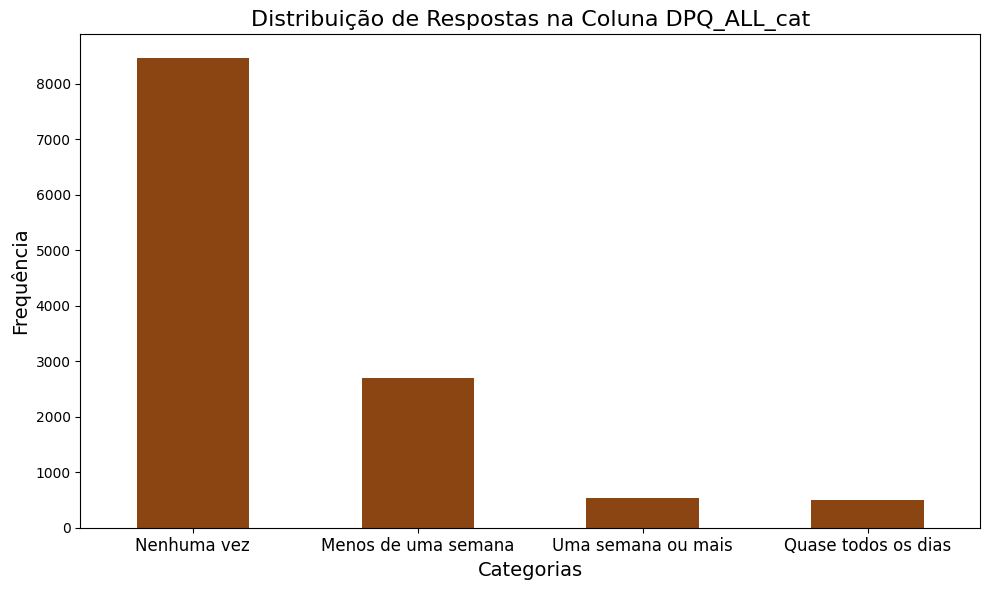

In [ ]:
# Separando as respostas concatenadas em palavras individuais
respostas_separadas = df_demo['DPQ_ALL_cat'].str.split(r'\s+', expand=True)

todas_respostas = respostas_separadas.stack()

# Mapeamento das respostas para categorias
mapeamento_categorias = {
    'Nenhuma': 'Nenhuma vez',
    'vez': 'Nenhuma vez',
    'Menos': 'Menos de uma semana',
    'semanaMenos': 'Menos de uma semana',
    'Uma': 'Uma semana ou mais',
    'semanaUma': 'Uma semana ou mais',
    'maisUma': ' Uma semana ou mais',
    'Quase': 'Quase todos os dias',
    'diasQuase': 'Quase todos os dias'
}

# Aplicando o mapeamento para categorizar as respostas
todas_respostas_categorizadas = todas_respostas.map(mapeamento_categorias)

# Contando a frequência de cada categoria
frequencias_categorias = todas_respostas_categorizadas.value_counts()

# Ordenando as categorias na ordem desejada
ordem_categorias = [
    'Nenhuma vez',
    'Menos de uma semana',
    'Uma semana ou mais',
    'Quase todos os dias'
]
frequencias_categorias = frequencias_categorias.reindex(ordem_categorias)

plt.figure(figsize=(10, 6))
frequencias_categorias.plot(kind='bar', color='#8B4513')

plt.title('Distribuição de Respostas na Coluna DPQ_ALL_cat', fontsize=16)
plt.xlabel('Categorias', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

Neste gráfico observa-se que possui mais pessoas com respostas de `nenhuma vez`, e assim, podemos observar uma distribuição assimétrica para a direita,e assim temos mais pessoas com uma pontuação mais baixa.

Vamos ver como está a distribuição na coluna númerica `DPQ_ALL_num`.

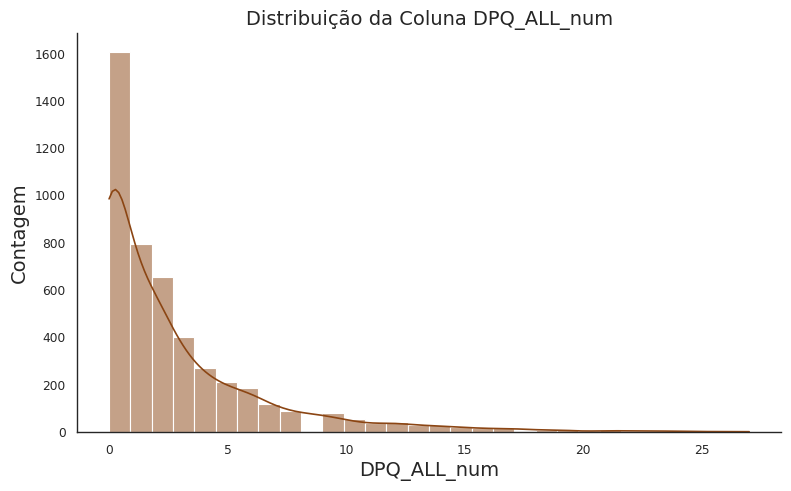

In [ ]:
# Plotar um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper")


# Definindo a paleta de cores
colors = ["#8B4513"]
sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(8,5))
sns.histplot(df['DPQ_ALL_num'], bins=30, kde=True)

# Melhorias de storytelling
plt.title('Distribuição da Coluna DPQ_ALL_num', fontsize=14)
plt.xlabel('DPQ_ALL_num', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
sns.despine(right=True)

plt.tight_layout()
plt.show()

Temos uma distribuição assimétrica para a direita.

Em seguida, iremos plotar um gráfico de barras para observamos a distribuição de gênero dos indíviduos na coluna `RIAGENDR`

<ipython-input-32-e5ab6cfcbaa1>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, ha='center')


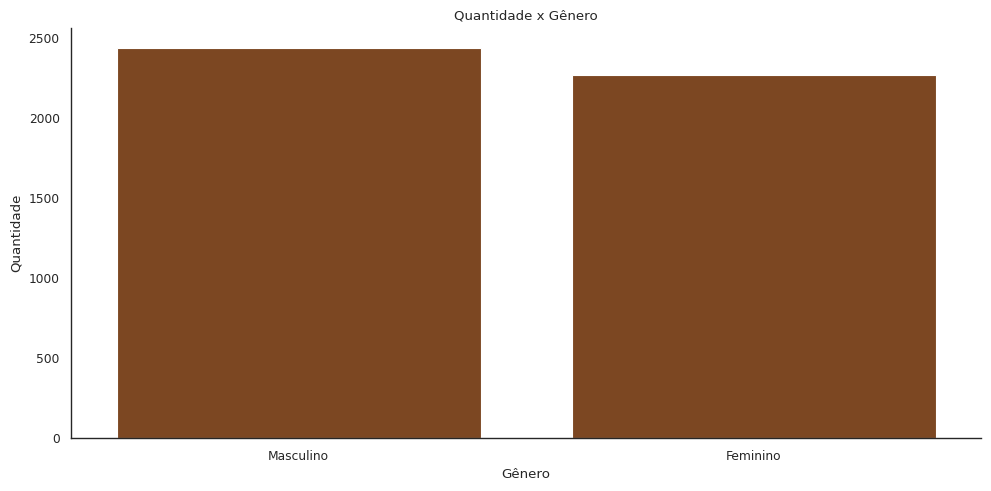

In [ ]:
# Plotando um gráfico de barras para ver a distribuição de gênero
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta de cores
colors = ["#8B4513", "#6F4E37"]

sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(10, 5))
count = df['RIAGENDR'].value_counts()
sns.countplot(x='RIAGENDR', data=df, order=count.index)
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Gênero')

# Definindo os rótulos do eixo x e rotação
labels = ["Masculino","Feminino"]
ax.set_xticklabels(labels, ha='center')

sns.despine(right=True)

plt.tight_layout()
plt.show()

A quantidade de gêneros estão bem uniforme.

Seguiremos com a análise da variável correspondente a idade na coluna `RIDAGEYR`. Plotaremos um histograma e logo após, iremos analisar a média, mediana, desvio padrão e quartis desta variável, buscando entender a distribuição da mesma.

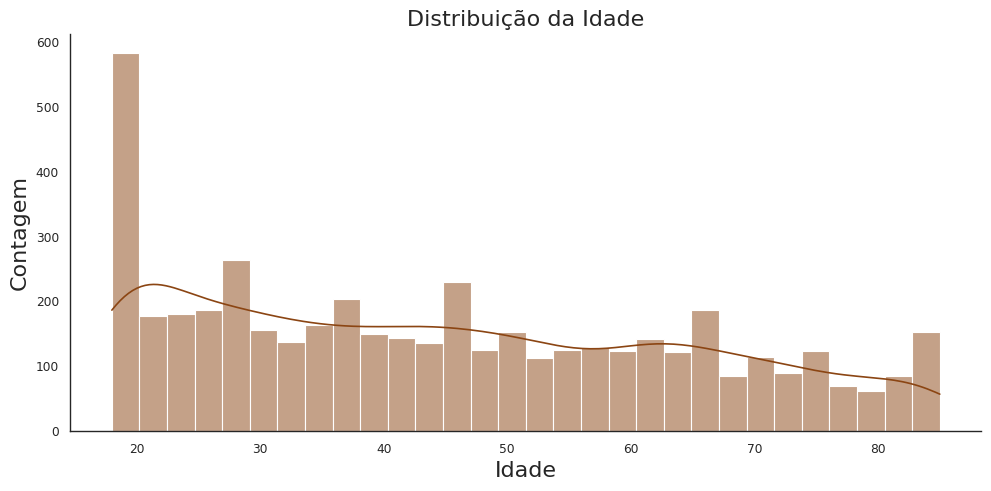

In [ ]:
# Analisando a variável idade
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta de cores
colors = ["#8B4513"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(10,5))
sns.histplot(df['RIDAGEYR'], bins=30, kde=True)
plt.title('Distribuição da Idade', fontsize=16)
plt.xlabel('Idade', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
sns.despine(right=True)

plt.tight_layout()
plt.show()

In [ ]:
df.RIDAGEYR.describe()

,RIDAGEYR
count,4702.000000
mean,44.918120
std,19.849216
min,18.000000
25%,27.000000
50%,43.000000
75%,61.000000
max,85.000000


Nesta análise a idade máxima  foi 85 anos, a média é de 44 anos, mediana de 43 anos e tem um desvio pasdrão de 19 anos, com isto, temos uma distribuição mais uniforme neste gráfico. Veja que até aos 20 anos de idade temos uma boa quantidade de usuários.

Seguiremos com a análise de raça  / etnia na coluna `RIDRETH1`.

<ipython-input-35-f7c7a74c2201>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-35-f7c7a74c2201>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ordered_categories, rotation=45, ha='right')


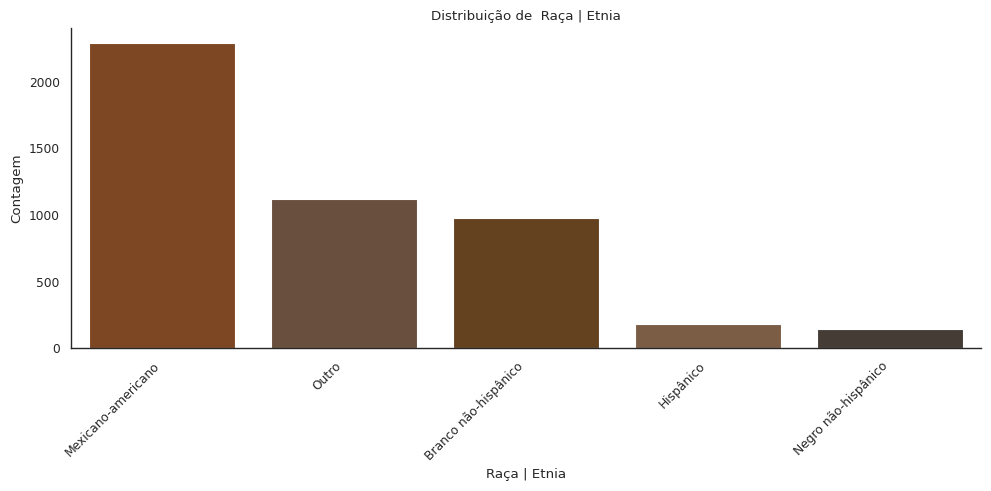

In [ ]:
# plotando o gráfico de barras para analisar a raça | etnia
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta de cores
colors = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#483C32"]
sns.set_palette(sns.color_palette(colors))

# Mapeando valores para categorias
race_ethnicity_mapping = {
    1: "Branco não-hispânico",
    2: "Negro não-hispânico",
    3: "Mexicano-americano",
    4: "Outro",
    5: "Hispânico"
}
df['RIDRETH1_cat'] = df['RIDRETH1'].replace(race_ethnicity_mapping)

# Definindo a ordem das categorias
ordered_categories = [
    "Mexicano-americano",
    "Outro",
    "Branco não-hispânico",
    "Hispânico",
    "Negro não-hispânico"
]

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    x='RIDRETH1_cat',
    data=df,
    order=ordered_categories,
    palette=colors
)
ax.set_xlabel('Raça | Etnia')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição de  Raça | Etnia')
ax.set_xticklabels(ordered_categories, rotation=45, ha='right')

sns.despine(right=True)

# Ajustando layout
plt.tight_layout()
plt.show()


Nota-se que temos maior incidência de pessoas mexicano-americano e poucas de negro não hispânico, e assim, verifica que temos uma distribuição não uniforme.

Abaixo, veremos sobre a escolaridade das pessoas na coluna `DMDEDUC`.

<ipython-input-36-aae53c3eef8d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-36-aae53c3eef8d>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ordered_categories, rotation=45, ha='right')


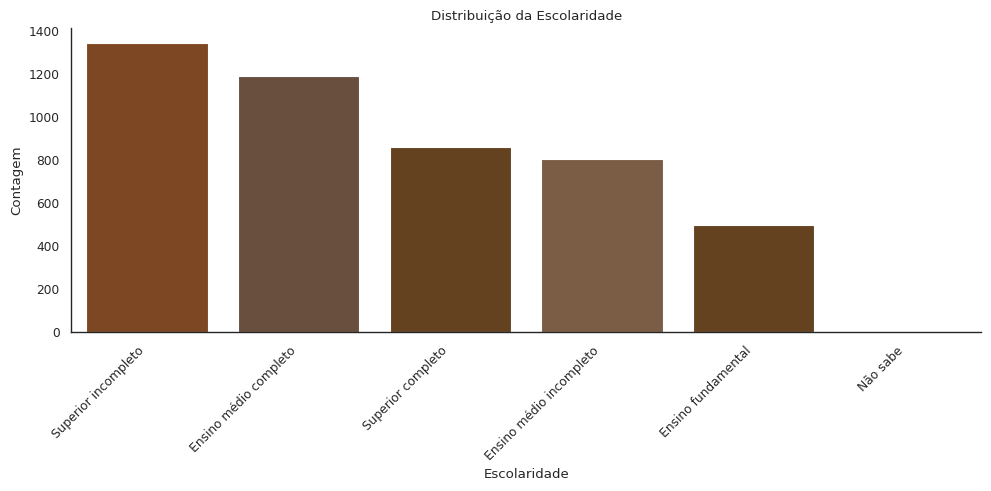

In [ ]:
# Plotando o gráfico de barras para vermos a distribuição relacionada a escolaridade
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta inicial de cores
initial_colors = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#704214", "#483C32"]

# Mapeando valores para categorias
escolaridade_mapping = {
    1: "Ensino fundamental",
    2: "Ensino médio incompleto",
    3: "Ensino médio completo",
    4: "Superior incompleto",
    5: "Superior completo",
    9: "Não sabe"
}

df['DMDEDUC_cat'] = df['DMDEDUC'].replace(escolaridade_mapping)

# Calculando as contagens e ordenando as categorias por ordem decrescente
count = df['DMDEDUC_cat'].value_counts()
ordered_categories = count.index.tolist()

# Reordenando as cores com base na ordem das categorias
ordered_colors = [initial_colors[ordered_categories.index(cat)] for cat in ordered_categories]

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    x='DMDEDUC_cat',
    data=df,
    order=ordered_categories,
    palette=ordered_colors
)
ax.set_xlabel('Escolaridade')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição da Escolaridade')

ax.set_xticklabels(ordered_categories, rotation=45, ha='right')

sns.despine(right=True)

# Ajustando layout
plt.tight_layout()
plt.show()


Aqui, observamos que há mais pessoas com superior incompleto e ensino médio completo.

Abaixo iremos definir os valores das categorias das variáveis da coluna `INDFMINC` para a `INDFMINC_cat`, e em seguida analisaremos a distribuição da faixa de renda.

<ipython-input-37-85192d230f32>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-37-85192d230f32>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ordered_categories, rotation=45, ha='right')


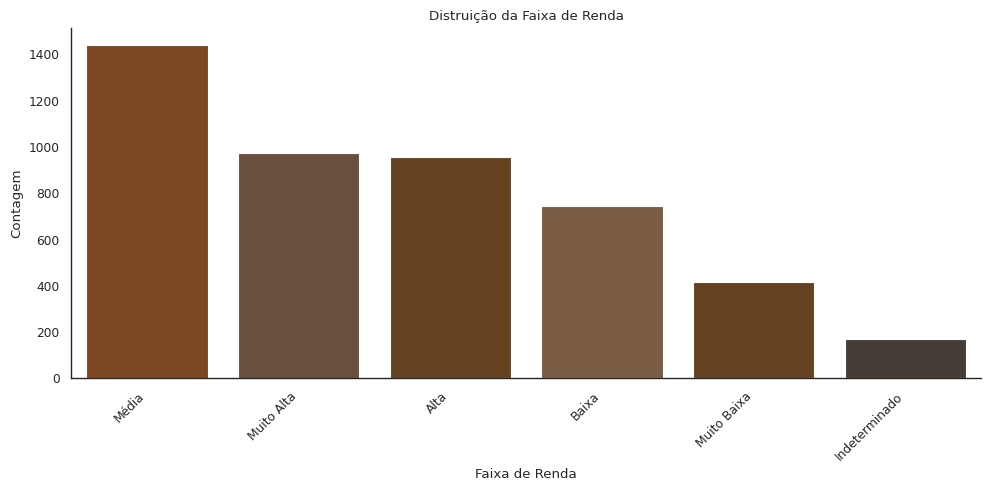

In [ ]:
# Definindo as categorias
def categorize_income(value):
    if value in [1, 2]:
        return "Muito Baixa"
    elif value in [3, 4]:
        return "Baixa"
    elif value in [5, 6, 7]:
        return "Média"
    elif value in [8, 9, 10]:
        return "Alta"
    elif value == 11:
        return "Muito Alta"
    else:  # Valores 12, 13, 77, 99
        return "Indeterminado"

df['INDFMINC_cat'] = df['INDFMINC'].apply(categorize_income)

# Plotando gráfico referente a distribuição da faixa de renda
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta inicial de cores
initial_colors = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#704214", "#483C32"]

# Calculando as contagens e ordenando as categorias por ordem decrescente
count = df['INDFMINC_cat'].value_counts()
ordered_categories = count.index.tolist()
ordered_colors = [initial_colors[i] for i in range(len(ordered_categories))]

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    x='INDFMINC_cat',
    data=df,
    order=ordered_categories,
    palette=ordered_colors
)
ax.set_xlabel('Faixa de Renda')
ax.set_ylabel('Contagem')
ax.set_title('Distruição da Faixa de Renda')
ax.set_xticklabels(ordered_categories, rotation=45, ha='right')
sns.despine(right=True)

# Ajustando o layout
plt.tight_layout()
plt.show()


A maioria das pessoas possuem uma faixa de renda média, muito alta e alta.

Irei plotar um histograma para analisar o tempo de atividade física praticada pelos os indivíduos, dados da coluna `PAG_MINW`.

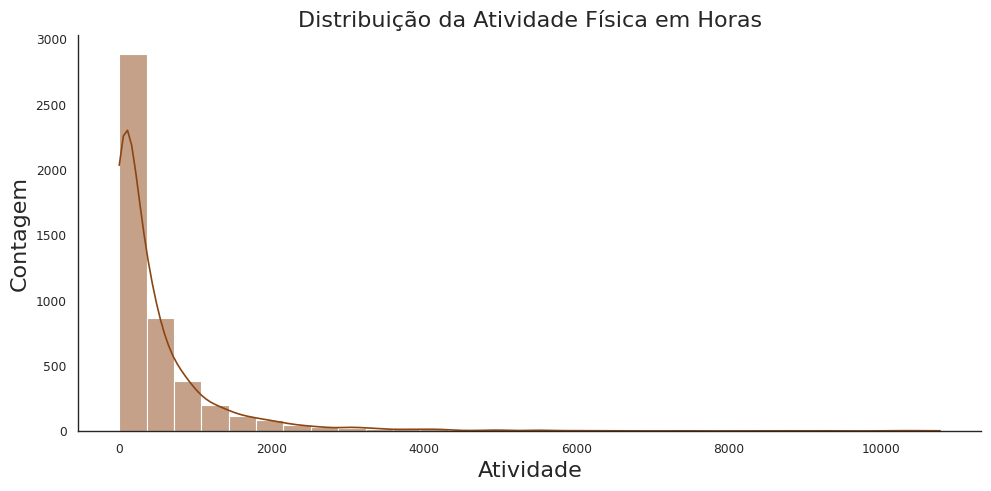

In [ ]:
# Plotando um gráfico para ver a distribuição da atividade física em horas
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta de cores
colors = ["#8B4513"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(10,5))
sns.histplot(df['PAG_MINW'], bins=30, kde=True)

plt.title('Distribuição da Atividade Física em Horas', fontsize=16)
plt.xlabel('Atividade', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
sns.despine(right=True)

plt.tight_layout()
plt.show()

É nitido que podemos ver que temos outlier nestes dados. Vamos analisar as medidas de tendência central e observar onde pode haver os outliers.

In [ ]:
df['PAG_MINW'].describe()

,PAG_MINW
count,4702.000000
mean,484.944251
std,796.184712
min,0.000000
25%,41.570439
50%,221.709007
75%,581.986143
max,10777.829099


Sabe-se que uma semana tem 10080 minutos e o valor máximo calculado foi 10777, o que torna impossivel alguem praticar exercicio neste total de minutos por semana.



Irei tratar o valor máximo com dados que possam ser referencia máxima onde individuos podem ser capaz de realizar semanalmente.
Aplicarei os dados de 40 horas semanais que equivalente a 2.460 minutos, teoricamente esse dados são os mais aceitaveis para realizar exercício físico semanalmente.

In [ ]:
# Definindo o limite máximo
limite_maximo = 2460

# Tratando os dados para que valores acima do limite sejam ajustados
df['PAG_MINW'] = df['PAG_MINW'].clip(upper=limite_maximo)

# Verificar o resultado
print(df['PAG_MINW'].describe())


count    4702.000000
mean      445.191975
std       584.183184
min         0.000000
25%        41.570439
50%       221.709007
75%       581.986143
max      2460.000000
Name: PAG_MINW, dtype: float64


Agora plotarei novamente o gráfico para observarmos como ficaram os dados tratos.

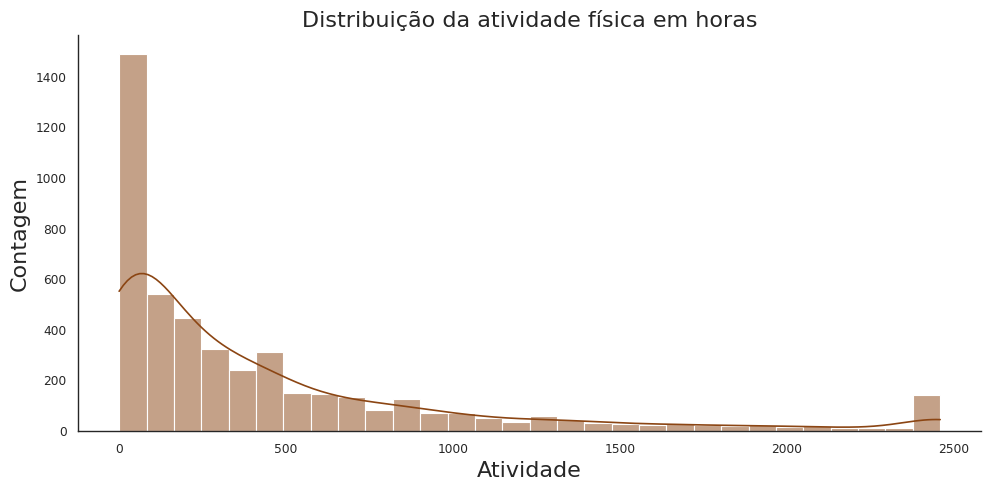

In [ ]:
# Plotando um gráfico para ver a distribuição da atividade física em horas
sns.set_style("white")
sns.set_context("paper")


# Definindo a paleta de cores
colors = ["#8B4513"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(10,5))
sns.histplot(df['PAG_MINW'], bins=30, kde=True)

plt.title('Distribuição da atividade física em horas', fontsize=16)
plt.xlabel('Atividade', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
sns.despine(right=True)

plt.tight_layout()
plt.show()

Temos um gráfico com uma distribuição assimétrica para a direita. Observa-se que a maioria das pessoas entrevistadas não praticam exercício físico.

Seguiremos analisando a aderência ao Physical Activity Guideline (PAG)  das pessoas na coluna `ADHERENCE`.

<ipython-input-42-383ed3555524>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette=colors, order=[3, 1, 2])


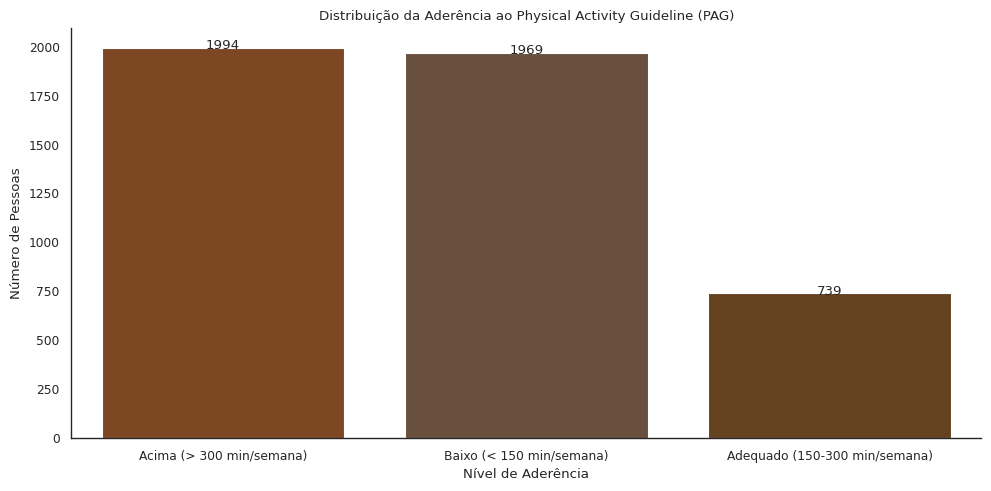

In [ ]:
# Plotando um gráfico de barras referente a distribuição da aderência ao Physical Activity Guideline (PAG)
sns.set_style("white")
sns.set_context("paper")

# Definindo a paleta de cores
colors = ["#8B4513", "#6F4E37", "#704214"]
# Nomes amigáveis para o eixo x
friendly_names = [
    'Acima (> 300 min/semana)',
    'Baixo (< 150 min/semana)',
    'Adequado (150-300 min/semana)'
]

# Contagem da variável ADHERENCE
count = df['ADHERENCE'].value_counts().reindex([3, 1, 2])

plt.figure(figsize=(10,5))
sns.barplot(x=count.index, y=count.values, palette=colors, order=[3, 1, 2])
plt.xticks(ticks=range(len(count)), labels=friendly_names)
plt.title('Distribuição da Aderência ao Physical Activity Guideline (PAG)')
plt.ylabel('Número de Pessoas')
plt.xlabel('Nível de Aderência')

# Colocando valores nas barras
for index, value in enumerate(count.values):
    plt.text(index, value + 10, str(value), ha='center', va='center')

sns.despine()
plt.tight_layout()
plt.show()

O nível de aderência ao guia está acima ou abaixo do esperado, e poucos possuem a aderência adequado ao guia.

Analisando o score total da alimentação saudável obtida por cada individuo da pesquisa na coluna `HEI2015_TOTAL_SCORE`.

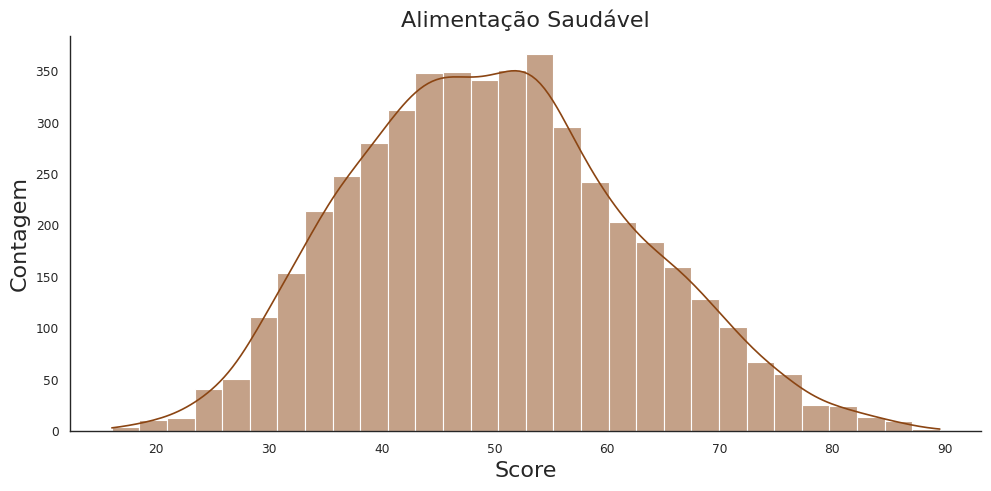

In [ ]:
# Plotar um gráfico de barras para entendermos sobre o score da alimentação
sns.set_style("white")
sns.set_context("paper")


# Definindo a paleta de cores
colors = ["#8B4513"]

sns.set_palette(sns.color_palette(colors))

# Criando o histograma
plt.figure(figsize=(10,5))
sns.histplot(df['HEI2015_TOTAL_SCORE'], bins=30, kde=True)

plt.title('Alimentação Saudável', fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
sns.despine(right=True)

plt.tight_layout()
plt.show()

Aqui tem uma distribuiçãso normal.

# ANÁLISE EXPLORATÓRIA BIVARIADA

# Analisando duas variáveis

Vamos plotar um gráfico de barras para analisarmos as variáveis `DPQ_ALL_num` e `RIAGENDR_cat`.

<ipython-input-44-9b97a3b826d3>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  g = sns.catplot(


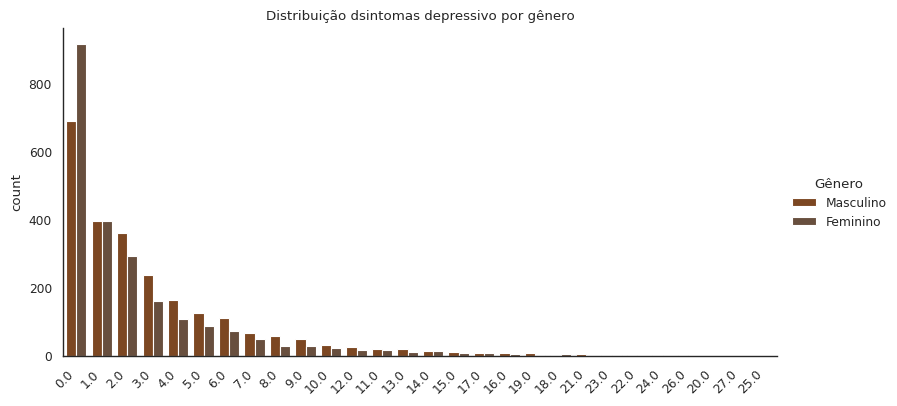

In [ ]:
# Plotando gráfico de barras para analisar as variáveis de sintomas depressivos com o gênero
count = df['DPQ_ALL_num'].value_counts()
order = count.index

gender_mapping = {1: "Masculino", 2: "Feminino"}
df['RIAGENDR_cat'] = df['RIAGENDR'].replace(gender_mapping).astype('category')

# Definindo a paleta de cores
custom_palette = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#704214", "#483C32"]

g = sns.catplot(
    data=df,
    x="DPQ_ALL_num",
    hue="RIAGENDR_cat",
    kind="count",
    height=4,
    aspect=2,
    order=order,
    palette=custom_palette  # Aplicando as cores personalizadas
)

g.set_xticklabels(order, rotation=45, ha='right')
g.set_axis_labels("", None)
g._legend.set_title("Gênero")

new_labels = ["Masculino", "Feminino"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.title("Distribuição dsintomas depressivo por gênero")
plt.show()


temos uma distribuição assimétrica neste gráfico, mas observe que o gênero feminino apresenta um valor mais alto.







Analisando as variavés `DPQ_ALL_num` com a variável `RIDAGEYR`.

<ipython-input-45-465d66a7e2fa>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adherence_sum = df.groupby('RIDAGEYR_cat')['DPQ_ALL_num'].sum().reset_index()
<ipython-input-45-465d66a7e2fa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RIDAGEYR_cat', y='DPQ_ALL_num', data=adherence_sum, palette=custom_palette)
<ipython-input-45-465d66a7e2fa>:15: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='RIDAGEYR_cat', y='DPQ_ALL_num', data=adherence_sum, palette=custom_palette)


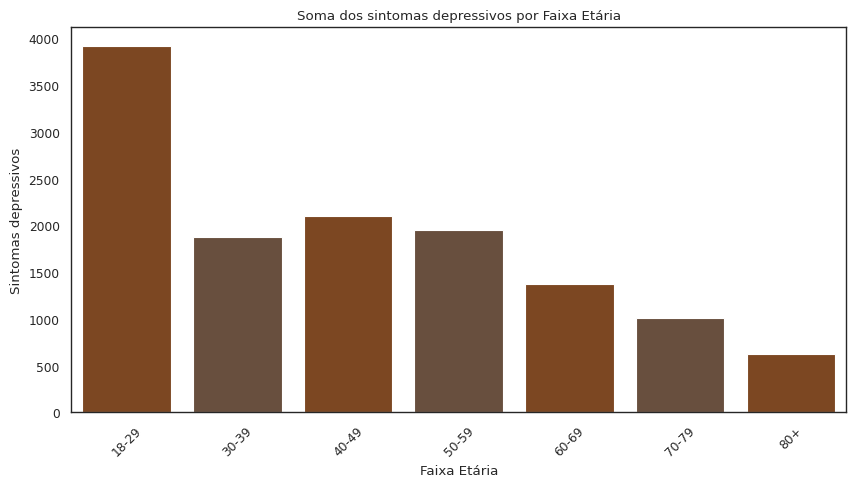

In [ ]:
# Analisando os sintomas depressivos com a faixa etária
bins = [18, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']


df['RIDAGEYR_cat'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)

adherence_sum = df.groupby('RIDAGEYR_cat')['DPQ_ALL_num'].sum().reset_index()

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 5))
custom_palette = ["#8B4513", "#6F4E37"]

# Criar o gráfico de barras com as somas
sns.barplot(x='RIDAGEYR_cat', y='DPQ_ALL_num', data=adherence_sum, palette=custom_palette)

# Ajustes no gráfico
plt.title('Soma dos sintomas depressivos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Sintomas depressivos')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

A distribuição permanece de forma simetrica, mas observe que idade entre 18 - 29 anos tem maiores indices depressivos

Analisando as variavés `DPQ_ALL_num` com a variável de Raça | Etnia `RIDRETH1`.

<Figure size 1000x500 with 0 Axes>

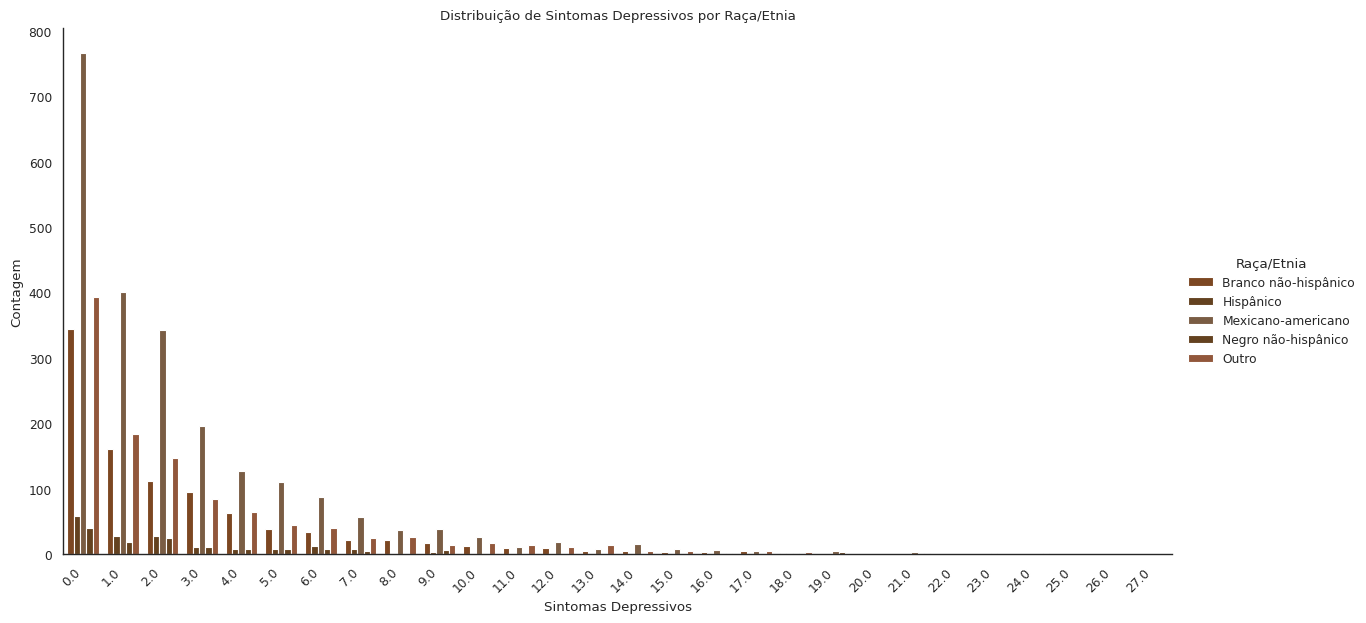

In [ ]:
# Analisando os sintomas depressivos com a raça
race_ethnicity_mapping = {
    1: "Branco não-hispânico",
    2: "Negro não-hispânico",
    3: "Mexicano-americano",
    4: "Outro",
    5: "Hispânico"
}

# Mapear os valores para rótulos descritivos
df['RIDRETH1_cat'] = df['RIDRETH1'].replace(race_ethnicity_mapping).astype('category')

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 5))
custom_palette = ["#8B4513", "#704214", "#835C3B", "#704214", "#A0522D"]

# Criando o gráfico
g = sns.catplot(
    data=df,
    x="DPQ_ALL_num",
    hue="RIDRETH1_cat",
    kind="count",
    height=6,
    aspect=2,
    palette=custom_palette
)

# Configurações do gráfico
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Sintomas Depressivos", "Contagem")
g._legend.set_title("Raça/Etnia")
plt.title("Distribuição de Sintomas Depressivos por Raça/Etnia")
plt.show()


Neste grafico temos uma distribuição assimetrica, mas veja que pessoas Mexicana-Americana tem valores bem mais alto que as outras raças.

Analisando as variavés `DPQ_ALL_num` com a variável escolaridade `DMDEDUC`.

<Figure size 1000x500 with 0 Axes>

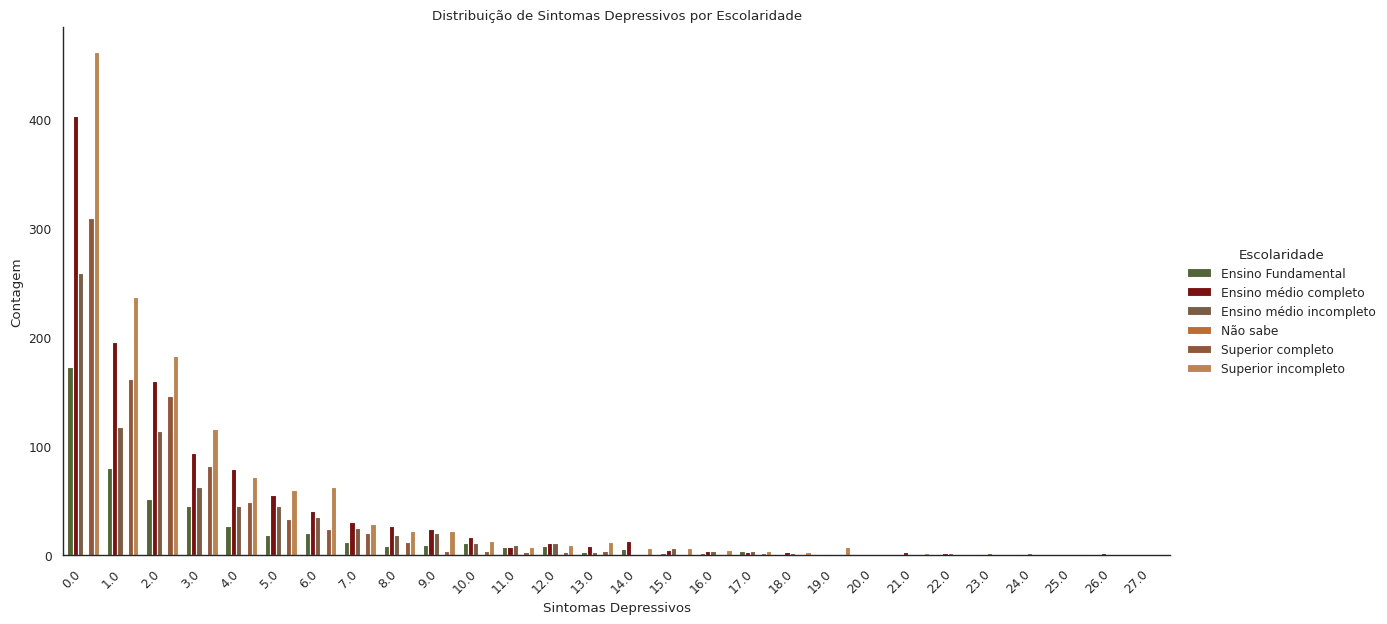

In [ ]:
escolaridade_mapping = {
    1: "Ensino Fundamental",
    2: "Ensino médio incompleto",
    3: "Ensino médio completo",
    4: "Superior incompleto",
    5: "Superior completo",
    9: "Não sabe"
}
# Mapear os valores de DMDEDUC para rótulos descritivos
df['DMDEDUC_cat'] = df['DMDEDUC'].replace(escolaridade_mapping).astype('category')

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 5))
custom_palette = ["#556B2F", "#8B0000", "#835C3B", "#D2691E", "#A0522D", "#CD853F"]

# Criando o gráfico
g = sns.catplot(
    data=df,
    x="DPQ_ALL_num",
    hue="DMDEDUC_cat",
    kind="count",
    height=6,
    aspect=2,
    palette=custom_palette
)
# Configurando o gráfico
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Sintomas Depressivos", "Contagem")
g._legend.set_title("Escolaridade")
plt.title("Distribuição de Sintomas Depressivos por Escolaridade")
plt.show()

Temos valores altos em ensino médio completo, incompleto e superior incompleto.

Analisando as variavés `DPQ_ALL_num` com a variável escolaridade `INDFMINC`.

<Figure size 1000x500 with 0 Axes>

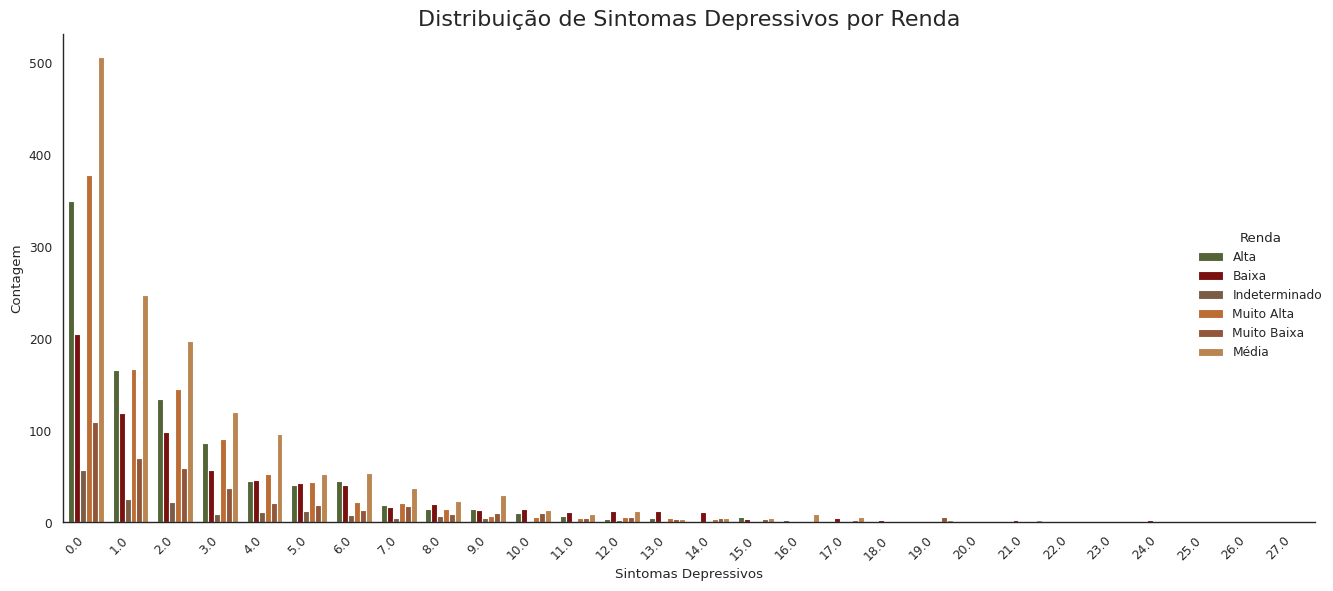

In [ ]:
# Função para categorizar a renda
def categorize_income(value):
    if value in [1, 2]:
        return "Muito Baixa"
    elif value in [3, 4]:
        return "Baixa"
    elif value in [5, 6, 7]:
        return "Média"
    elif value in [8, 9, 10]:
        return "Alta"
    elif value == 11:
        return "Muito Alta"
    else:  # Valores 12, 13, 77, 99
        return "Indeterminado"

# Criar uma nova coluna categorizada
df['INDFMINC_cat'] = df['INDFMINC'].apply(categorize_income).astype('category')

# Configuração do tamanho do gráfico
plt.figure(figsize=(10, 5))
custom_palette = ["#556B2F", "#8B0000", "#835C3B", "#D2691E", "#A0522D", "#CD853F"]

# Criando o gráfico
g = sns.catplot(
    data=df,
    x="DPQ_ALL_num",
    hue="INDFMINC_cat",
    kind="count",  # Adicionado para especificar o tipo de gráfico
    height=6,
    aspect=2,
    palette=custom_palette
)

# Configurando o gráfico
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Sintomas Depressivos", "Contagem")
g._legend.set_title("Renda")
plt.title("Distribuição de Sintomas Depressivos por Renda", fontsize=16)
plt.tight_layout()  # Evita sobreposições de elementos
plt.show()


Temos um gráfico que com variações de valores, a qual a renda média mostra uma contagem bem maior que outras rendas.

# Análises de multivaráveis

<ipython-input-49-0fbf7eeb6b8d>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-49-0fbf7eeb6b8d>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-49-0fbf7eeb6b8d>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-49-0fbf7eeb6b8d>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-49-0fbf7eeb6b8d>:35: UserWarning: set_ticklabels() should

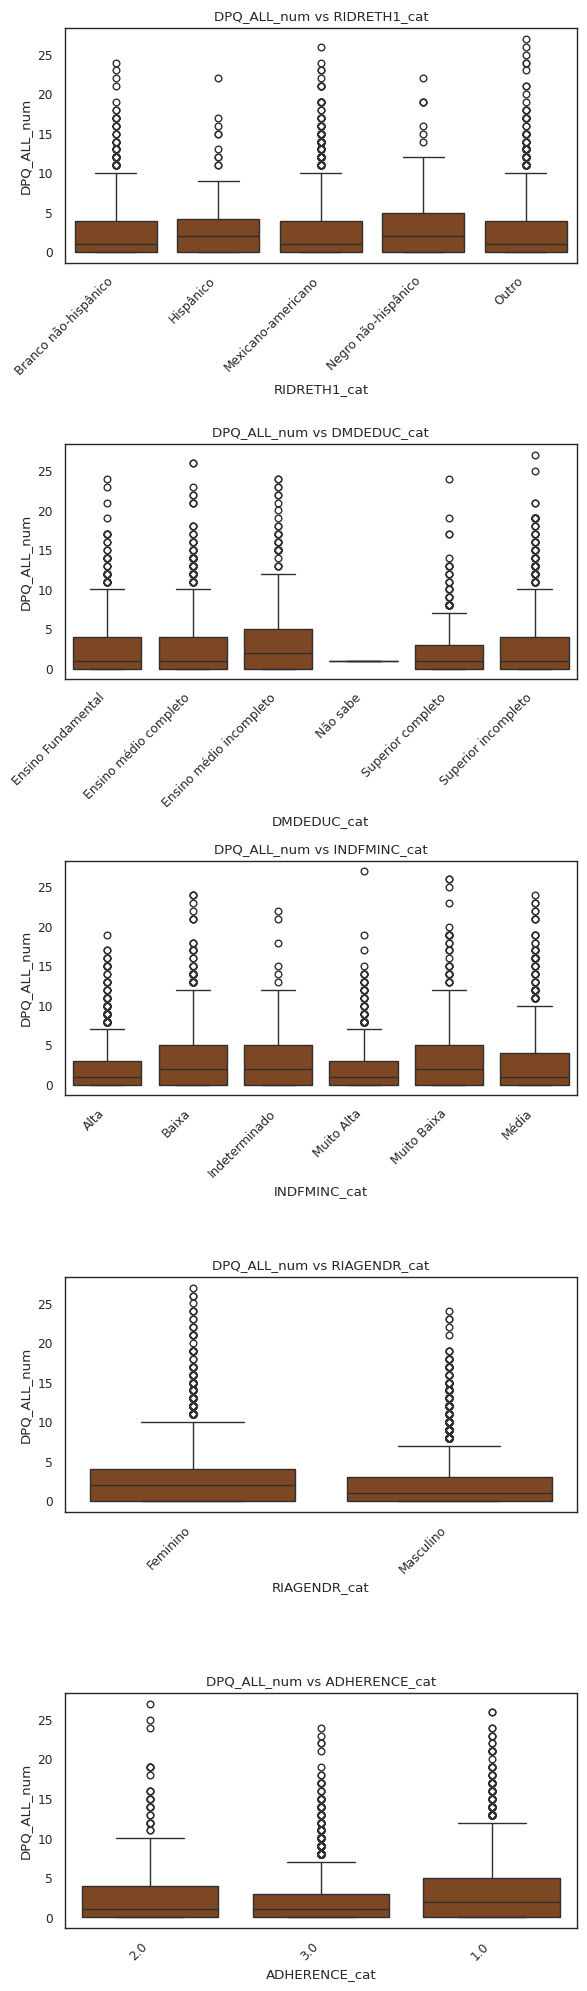

In [ ]:
# Analisando várias variáveis categóricas com a variável DPQ_ALL_num
df['ADHERENCE_cat'] = df['ADHERENCE'].astype(str)

colors = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#704214", "#483C32"]
sns.set_palette(sns.color_palette(colors))

# Definindo variável de interesse
var_to_plot = 'DPQ_ALL_num'

# Variáveis que você deseja relacionar
related_vars = ['RIDRETH1_cat', 'DMDEDUC_cat', 'INDFMINC_cat',
    'RIAGENDR_cat', 'ADHERENCE_cat']

# Quantidade de linhas e colunas para subplots
nrows = len(related_vars)
ncols = 1

# Plotando
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4*nrows))

# Garantir que axes seja sempre bidimensional
if nrows == 1:
    axes = np.array([axarr])
else:
    axes = axarr

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace)

for i, rel_var in enumerate(related_vars):
    ax = axes[i]
    sns.boxplot(x=rel_var, y=var_to_plot, data=df, ax=ax)
    ax.set_title(f'{var_to_plot} vs {rel_var}')
    # Rotaciona a legenda
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

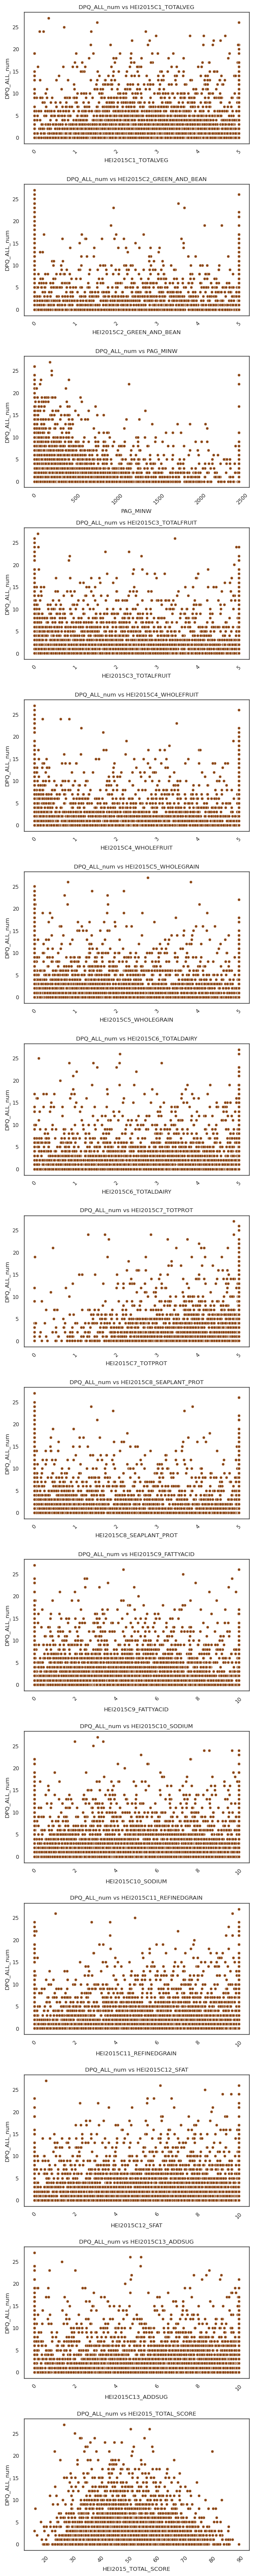

In [ ]:
# Analisando várias variáveis do escore de alimentação com a variavel DPQ_ALL_num
colors = ["#8B4513", "#6F4E37", "#704214", "#835C3B", "#704214", "#483C32"]
sns.set_palette(sns.color_palette(colors))

# Definindo variável de interesse e relacionadas
var_to_plot = 'DPQ_ALL_num'
related_vars = ['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'PAG_MINW',
                'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
                'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
                'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
                'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']

# Configuração de subplots
nrows = len(related_vars)
ncols = 1
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4 * nrows))

# Ajuste caso seja apenas um gráficos
if nrows == 1:
    axarr = [axarr]

fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iteração para gerar gráficos
for i, rel_var in enumerate(related_vars):
    ax = axarr[i]
    sns.scatterplot(x=rel_var, y=var_to_plot, data=df, ax=ax)
    ax.set_title(f'{var_to_plot} vs {rel_var}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

________________________________________________________________________________________________________________________________________________________________

# Testes de Hipóteses



________________________________________________________________________________________________________________________________________________________________

Iremos realizar o teste de hipóteses para correlação de Pearson para os questionamentos abaixo com as seguintes hipóteses:



h0: Não há correlação significativa!

ha: Há correlação significativa!

> Há correlação entre o score de alimentação saudável e os sintomas depressivos?



In [ ]:
stats.pearsonr(df.DPQ_ALL_num, df.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=-0.07094563824018421, pvalue=1.1178707450863218e-06)


> Há correlação entre o tempo de atividade fisica por semana com os sintomas depressivos?



In [ ]:
stats.pearsonr(df.DPQ_ALL_num, df.PAG_MINW)

PearsonRResult(statistic=-0.07980609077059732, pvalue=4.260948667213176e-08)

Para o teste de pearson entre os sintomas depressivos com o escore de alimentação saudável e o tempo de atividade física por semana, não rejeitamos a hipotese, há uma correlação significativa entre as variáveis.

________________________________________________________________________________________________________________________________________________________________

Realizando o teste qui-quadrado para ver se a média da coluna `DPQ_ALL_num` tem variância conforme o gênero `RIAGENDER_cat`.

In [ ]:

df_demo['RIAGENDER_cat'] = df_demo['RIAGENDR'].map({1: "Masculino", 2: "Feminino"})

print(df_demo['DPQ_ALL_num'].dtype)

if df_demo['DPQ_ALL_num'].dtype != object:
    df_demo['DPQ_ALL_num'] = df_demo['DPQ_ALL_num'].astype(str)

df_demo['DPQ_ALL_num'] = df_demo['DPQ_ALL_num'].str.split(expand=True)[0]

# Criar a Tabela de Contingência
tabela_contingencia = pd.crosstab(df_demo['DPQ_ALL_num'], df_demo['RIAGENDER_cat'])

if tabela_contingencia.empty:
    print("Contingency table is empty. Check the input columns for common values.")
else:
    chi2_stat, p_value, dof, expected = chi2_contingency(tabela_contingencia)

    print(f'Estatística Qui-Quadrado: {chi2_stat}')
    print(f'Valor de p: {p_value}')

    # Interpretação do p-value
    if p_value < 0.05:
        print("Rejeitamos a hipótese nula. Há uma diferença significativa entre DPQ_ALL_num e Gênero.")
    else:
        print("Não rejeitamos a hipótese nula. Não há uma associação significativa entre DPQ_ALL_num e Gênero.")

object
Estatística Qui-Quadrado: 113.97424194846789
Valor de p: 1.1744495843073131e-12
Rejeitamos a hipótese nula. Há uma diferença significativa entre DPQ_ALL_num e Gênero.


O resultado indicam que há não há uma associação entre o DPQ_ALL e os gêneros masculino e feminino.

Realizando o teste qui-quadrado para ver se a média da coluna `DPQ_ALL_num` tem variância conforme a idade `RIDAGEYR`.

In [ ]:
from scipy.stats import f_oneway

# Criar faixas etárias
bins = [18, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels)

# ANOVA
groups = [df[df['age_group'] == age]['DPQ_ALL_num'] for age in labels]
f_stat, p_value = f_oneway(*groups)

print(f"Estatística F: {f_stat}, p-valor: {p_value}")

# Interpretando o resultado
alpha = 0.05
if round(p_value,2) < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre DPQ_ALL_num e idade.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre DPQ_ALL_num e idade.")


Estatística F: 4.993497179449641, p-valor: 4.154419930421722e-05
Rejeitamos a hipótese nula. Há uma diferença significativa entre DPQ_ALL_num e idade.


Realizando o teste qui-quadrado para ver se a média da coluna `DPQ_ALL_num` tem variância conforme a escolaridade da variável da coluna `DMDEDUC`.

In [ ]:
# Criar a Tabela de Contingência entre DPQ_ALL e escolaridade
tabela_contingencia = pd.crosstab(df_demo['DPQ_ALL_num'], df_demo['DMDEDUC'])

# Aplicar o Teste de Qui-Quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print(f'Estatística Qui-Quadrado: {chi2_stat}')
print(f'Valor de p: {p_value}')

# Interpretação do p-value
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma associação significativa entre DPQ_ALL_num e Escolaridade.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma associação significativa entre DPQ_ALL_num e Escolaridade.")


Estatística Qui-Quadrado: 159.40756908669556
Valor de p: 0.07432961024262971
Não rejeitamos a hipótese nula. Não há uma associação significativa entre DPQ_ALL_num e Escolaridade.


Observa-se que não há uma associação entre a média das respostas referente a DPQ_ALL_num e a escolaridade, pois o valor de p é maior que o nivel de significância.

Realizando o teste F (Análise de variância) para ver se a média da coluna Raça | Etnia `RIDRETH1` tem variância conforme os sintomas depressivos.

In [ ]:
from scipy.stats import f_oneway

groups = [df[df['RIDRETH1_cat'] == cat]['DPQ_ALL_num'] for cat in race_ethnicity_mapping.values()]
f_stat, p_value = f_oneway(*groups)

print(f"Estatística F: {f_stat}")
print(f"p-valor: {p_value}")

# Interpretando o resultado
alpha = 0.05
if round(p_value,2) < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os sintomas depressivos e a raça | etnia.")
else:
    print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os sintomas depressivos e a raça | etnia.")

Estatística F: 2.3899010787592037
p-valor: 0.04869122994870757
Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os sintomas depressivos e a raça | etnia.


Vemos que não há uma diferença significativa entre os grupos, logo temos um resultado de p valor maior que o nivel de significância.

Analisando a média da coluna `DPQ_ALL_num` com a coluna `INDFMINC_cat `para ver se tem variância na média.

In [ ]:
# Garantir que os valores são numéricos e remover NaN
df = df.dropna(subset=['INDFMINC_cat', 'DPQ_ALL_num'])

# Extrair os grupos
Muito_Baixa = df[df['INDFMINC_cat'] == 'Muito Baixa']['DPQ_ALL_num'].dropna().tolist()
Baixa = df[df['INDFMINC_cat'] == 'Baixa']['DPQ_ALL_num'].dropna().tolist()
Média = df[df['INDFMINC_cat'] == 'Média']['DPQ_ALL_num'].dropna().tolist()
Alta = df[df['INDFMINC_cat'] == 'Alta']['DPQ_ALL_num'].dropna().tolist()
Muito_alta = df[df['INDFMINC_cat'] == 'Muito Alta']['DPQ_ALL_num'].dropna().tolist()
Indeterminada = df[df['INDFMINC_cat'] == 'Não sabe']['DPQ_ALL_num'].dropna().tolist()

# Verificar se os grupos não estão vazios
grupos = [Muito_Baixa, Baixa, Média, Alta, Muito_alta, Indeterminada]
grupos_validos = [g for g in grupos if len(g) > 0]

if len(grupos_validos) < 2:
    print("Erro: Não há grupos suficientes com dados para realizar o teste ANOVA.")
else:
    # Realizar a ANOVA
    f_stat, p_value = f_oneway(*grupos_validos)

    print(f"f-statistic: {f_stat}")
    print(f"p-value: {p_value}")

    # Interpretar o resultado
    alpha = 0.05
    if p_value < alpha:
        print("Rejeitamos a hipótese nula. Há uma diferença significativa entre os sintomas depressivos e a renda.")
    else:
        print("Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os sintomas depressivos e a renda.")


f-statistic: 30.532798390623164
p-value: 4.0976356457242457e-25
Rejeitamos a hipótese nula. Há uma diferença significativa entre os sintomas depressivos e a renda.


Neste caso, rejeitamos a hipótese nula. Há uma diferença significativa entre os grupos.

# Conclusão

### Respostas dos seguintes questionamentos:

1. *Perfil Depressivo de Adultos nos EUA (2005-2006):*  
    - *Gênero e depressão:* As mulheres apresentaram, em média, pontuações mais altas no rank da depressão, indicando maior prevalência com os sintomas depressivos em relação aos homens.

    - *Escolaridade e depressão:* Indivíduos com ensino médio incompleto registraram uma média maior em relação a depressão, sugerindo maior ocorrência de sintomas depressivos em comparação com outros níveis educacionais.

    - *Raça | etnia e depressão:* Observam-se diferenças significativas em negro não hispânicos com uma tendência maior a fatores depressivos.

    - *Renda e depressão:* Pessoas com renda muito baixa ou baixa apresentaram sintomas  mais elevados, refletindo maior intensidade de sintomas depressivos, enquanto aqueles com renda alta ou muito alta tiveram pontuações bem mais baixas.

2. *Estilo de Vida e Depressão:*  
    - *Alimentação e depressão:* Existe uma correlação significativa, embora fraca, entre o índice de alimentação saudável com os sintomas depressivos..  
    - *Atividade física e depressão:* A relação entre o tempo dedicado a exercícios físicos por semana e os sintomas depressivos também é significante, mas também fraca.

### Insights Gerais:

- A idade está significativamente associada ao índice de alimentação saudável, mas não à frequência de atividade física.  
- Gênero, escolaridade, raça/etnia e renda demonstram associações distintas com depressão, revelando a complexidade das interações entre fatores socioeconômicos, estilo de vida e saúde mental.  
- Testes estatísticos, como o qui-quadrado, indicam associações relevantes entre várias variáveis categóricas, embora o impacto dessas associações seja frequentemente modesto.  

### Recomendações para Estudos Futuros:

- *Validação do Modelo:* Dividir os dados em conjuntos de treino e teste pode melhorar a avaliação da capacidade preditiva dos modelos.  

- *Ampliação das Variáveis:* Incorporar outros fatores relacionados ao estilo de vida, como consumo de álcool, tabaco ou drogas ílicitas para obtermos uma visão mais completa e eficaz.

- *Intervenções Específicas:* Desenvolver programas que tenham como objetivo e estratégias direcionadas para grupos vulneráveis, como as mulheres que tenham baixa renda baseada nos padrões identificados nesta análise.  

